# Objective:
#####  The goal of this analysis is to explore key factors influencing salary variations based on different attributes such as education, experience, location, job title, age, and gender. Specifically, the objectives include:
- Analyze how salary varies across different levels of experience, age, education, and other factors.
- Determine how salary grows with years of experience.
- Assess whether higher education levels lead to higher salaries.
- Identify high-paying job roles.
- Analyze geographical differences in salary distribution.
- Explore how salary changes across different age groups.
- Identify any gender-based salary disparities.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_prediction_data.csv')

In [3]:
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


### Understanding Dataset

In [4]:
df.shape

(1000, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [6]:
df.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


In [7]:
df.dtypes

Education      object
Experience      int64
Location       object
Job_Title      object
Age             int64
Gender         object
Salary        float64
dtype: object

In [8]:
df.columns

Index(['Education', 'Experience', 'Location', 'Job_Title', 'Age', 'Gender',
       'Salary'],
      dtype='object')

### Missing Values

In [9]:
df.isnull().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

### Duplicates

In [10]:
df.duplicated().sum()

0

### Outliers

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

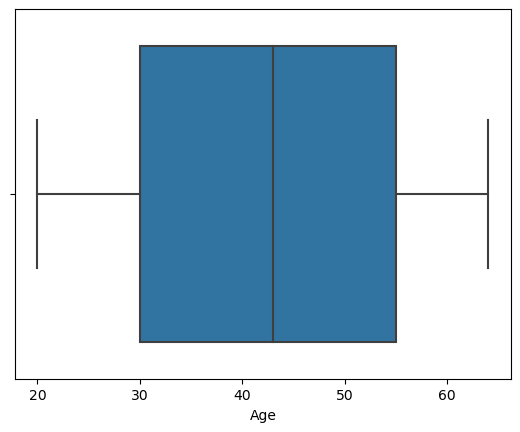

In [11]:
sns.boxplot(df['Age'])

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Experience'>

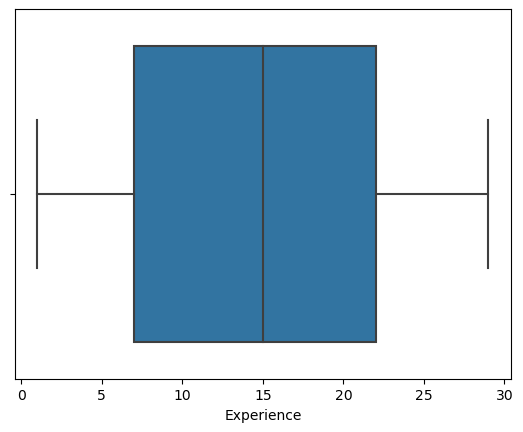

In [12]:
sns.boxplot(df['Experience'])

C:\Users\PMLS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

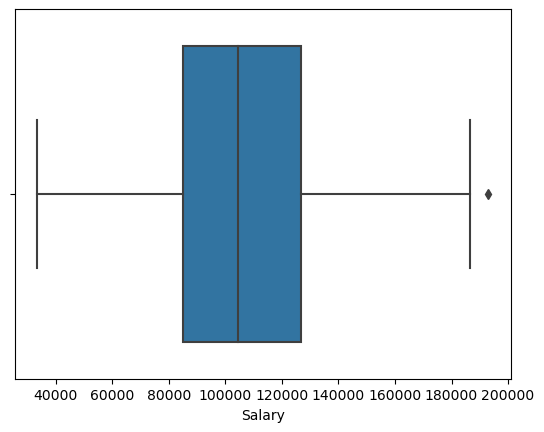

In [13]:
sns.boxplot(df['Salary'])

### EDA

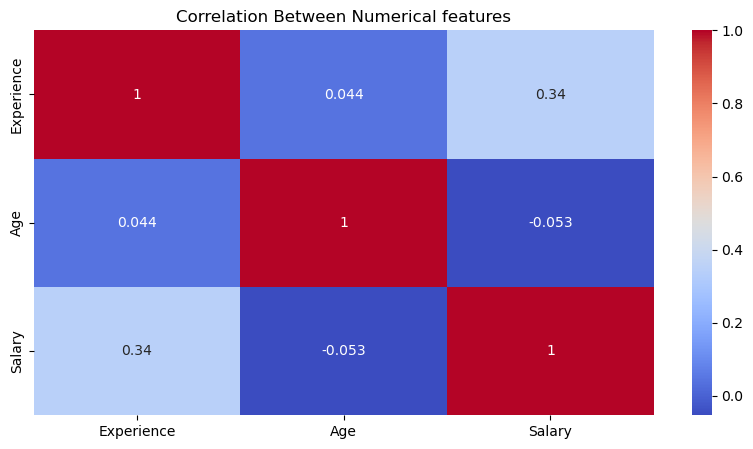

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical features")
plt.show()

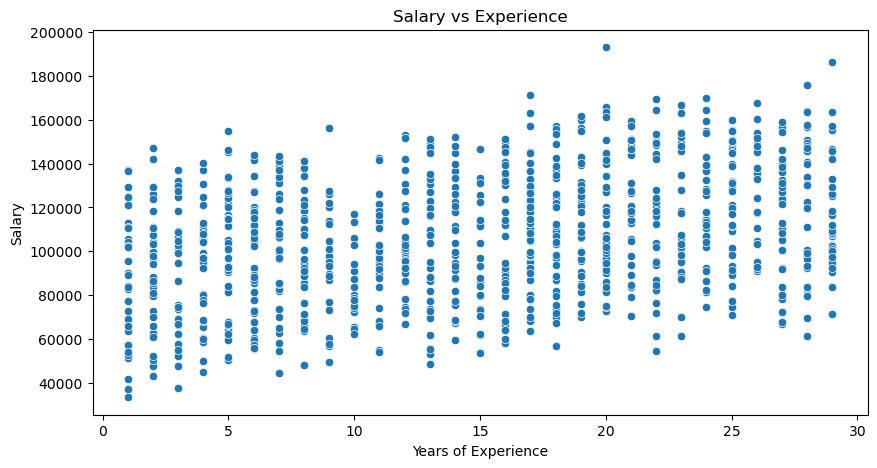

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Experience'],y=df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

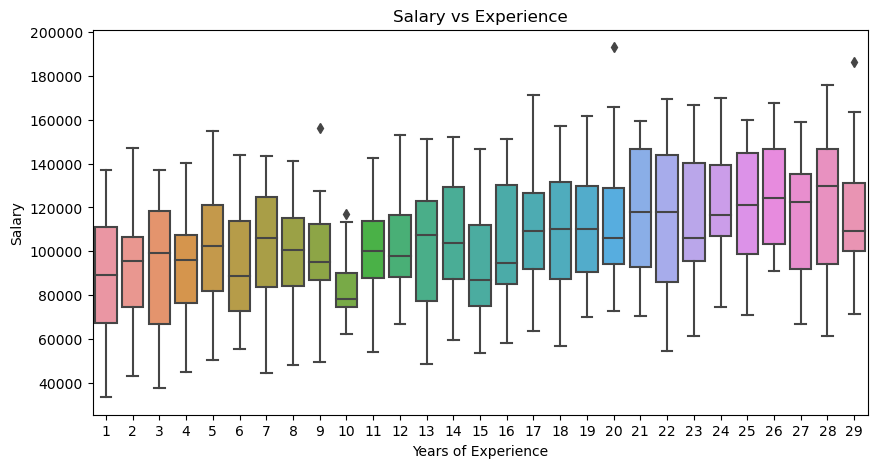

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Experience'],y=df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

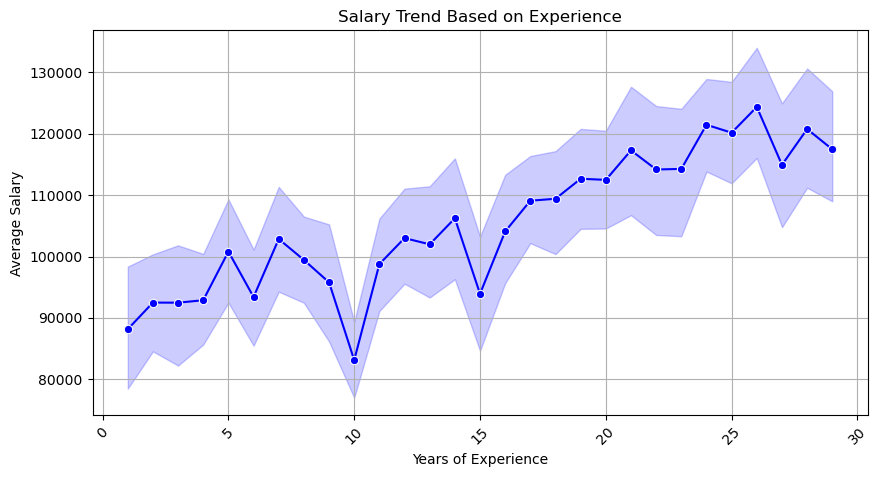

In [17]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Experience", y="Salary", data=df, marker="o", linestyle="-", color="b")

plt.xlabel("Years of Experience")
plt.ylabel("Average Salary")
plt.title("Salary Trend Based on Experience")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

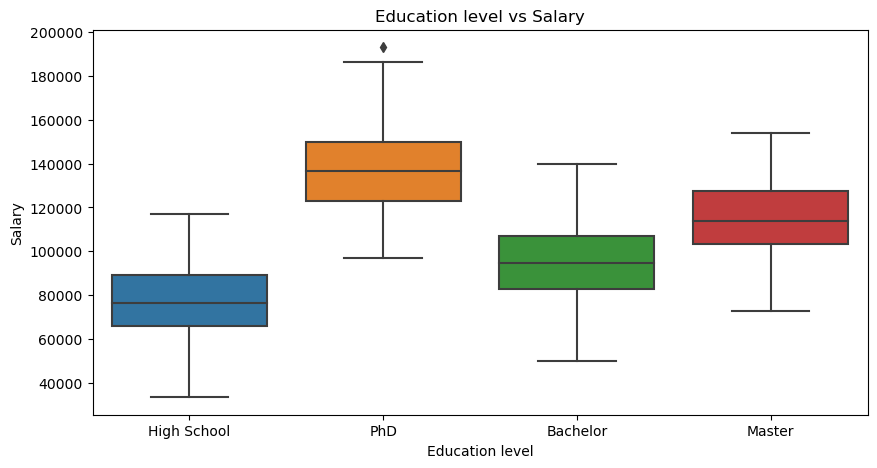

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Education'], y=df['Salary'])
plt.title('Education level vs Salary')
plt.xlabel('Education level')
plt.ylabel('Salary')
plt.xticks(rotation=0)
plt.show()

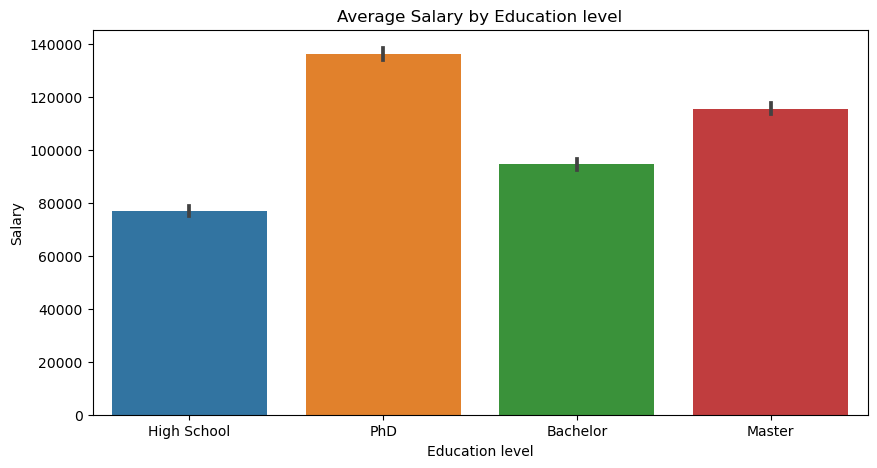

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Education'], y=df['Salary'])
plt.xlabel("Education level")
plt.ylabel("Salary")
plt.title("Average Salary by Education level")
plt.xticks(rotation=0)
plt.show()

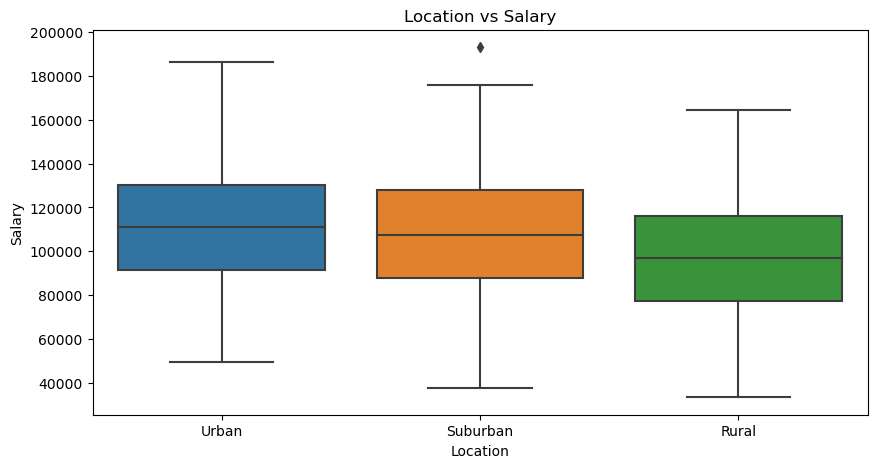

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Location'], y=df['Salary'])
plt.title('Location vs Salary')
plt.xlabel('Location')
plt.ylabel('Salary')
plt.xticks(rotation=0)
plt.show()

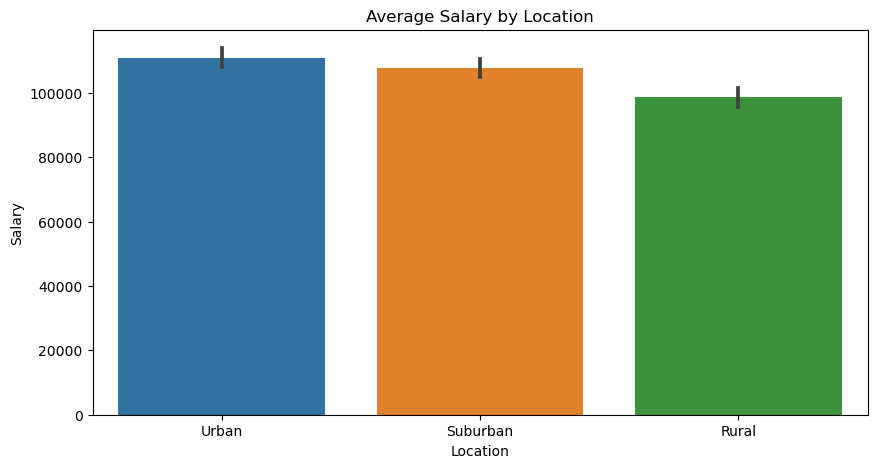

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Location'], y=df['Salary'])
plt.xlabel("Location")
plt.ylabel("Salary")
plt.title("Average Salary by Location")
plt.xticks(rotation=0)
plt.show()

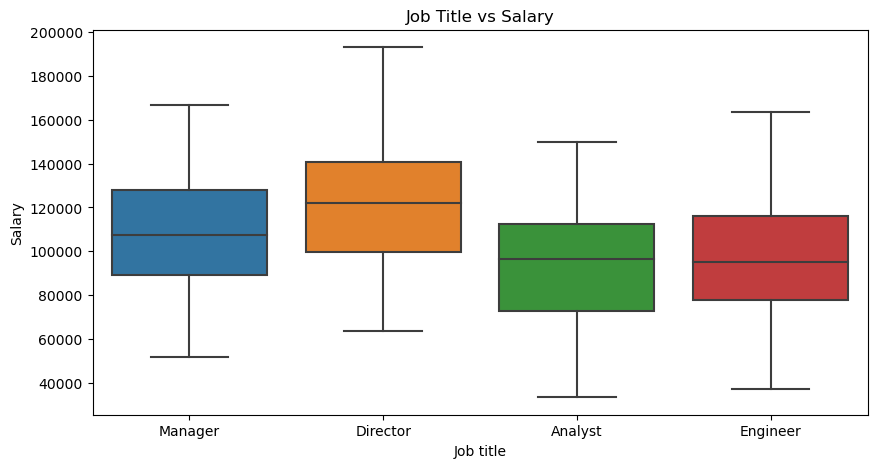

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Job_Title'], y=df['Salary'])
plt.title('Job Title vs Salary')
plt.xlabel('Job title')
plt.ylabel('Salary')
plt.xticks(rotation=0)
plt.show()

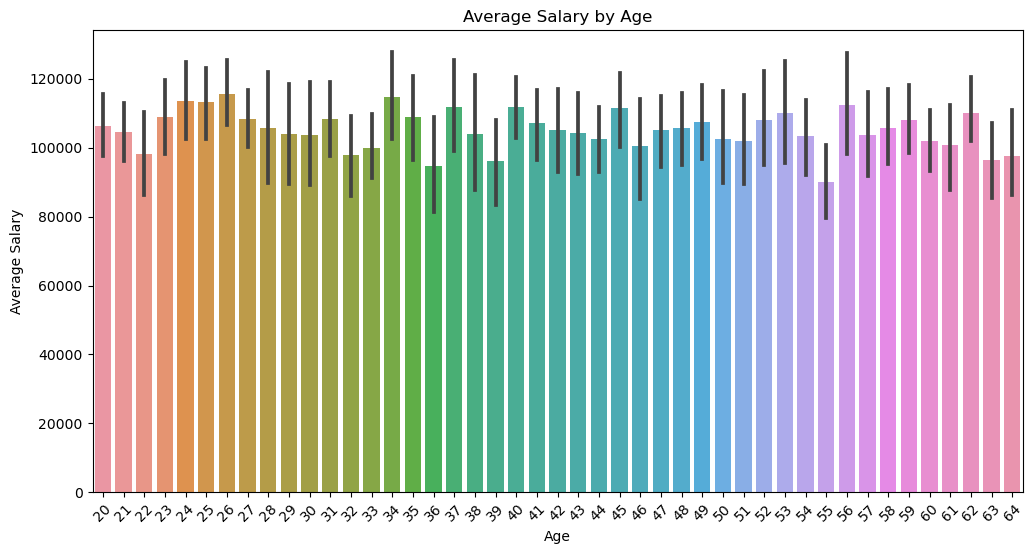

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Age'], y=df['Salary'], estimator=np.mean)
plt.xlabel("Age")
plt.ylabel("Average Salary")
plt.title("Average Salary by Age")
plt.xticks(rotation=45)
plt.show()

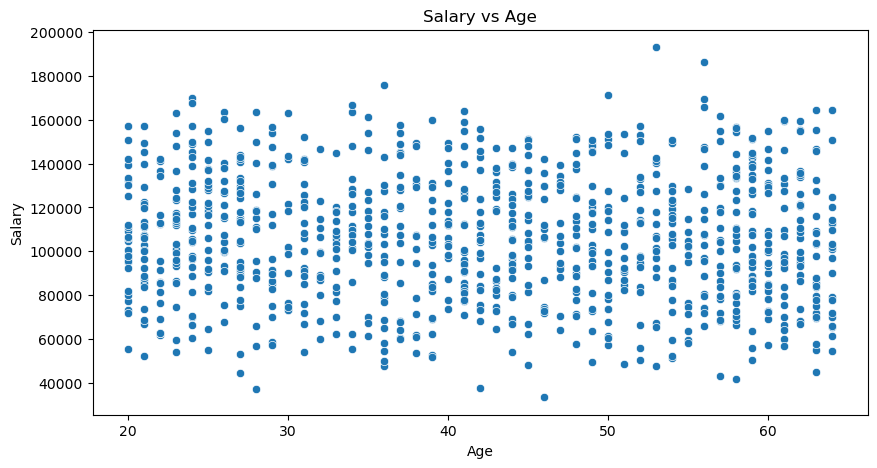

In [24]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Age'],y=df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Salary vs Age')
plt.show()

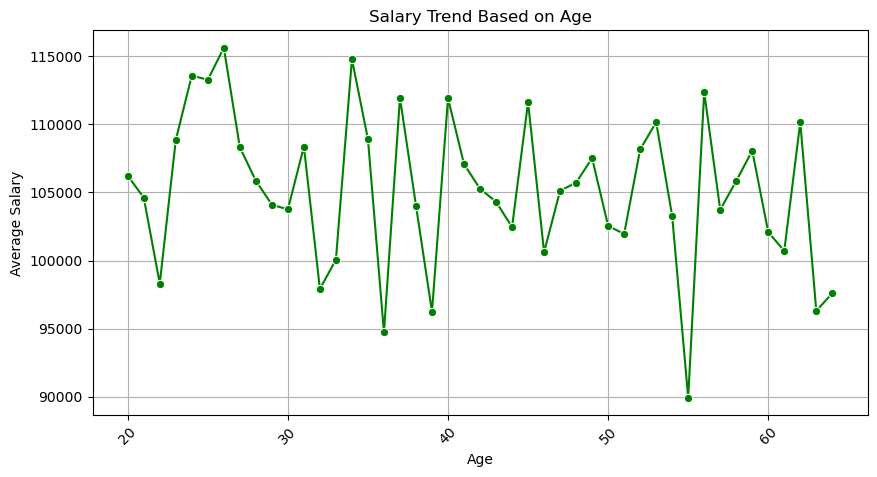

In [25]:
# Grouping data by Age and calculating the mean salary
age_salary = df.groupby("Age")["Salary"].mean().reset_index()

# Sorting values to ensure a proper trend line
age_salary = age_salary.sort_values("Age")

# Plotting the line chart
plt.figure(figsize=(10, 5))
sns.lineplot(x="Age", y="Salary", data=age_salary, marker="o", linestyle="-", color="g")

plt.xlabel("Age")
plt.ylabel("Average Salary")
plt.title("Salary Trend Based on Age")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

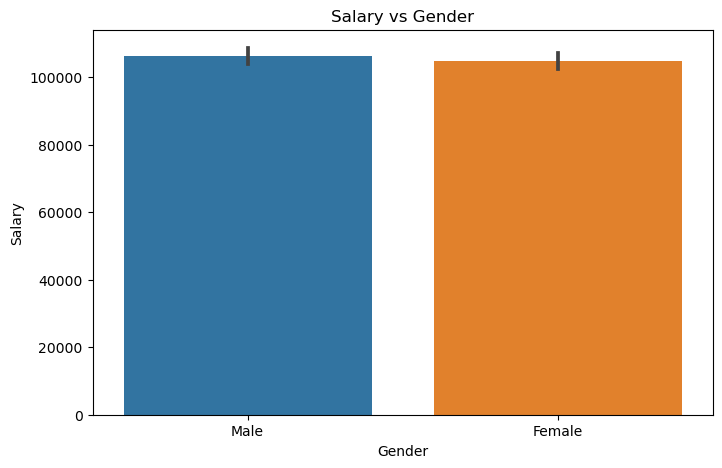

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Gender'], y=df['Salary'], estimator=np.mean)
plt.title('Salary vs Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

###  Summary of Insights: Salary Analysis
After analyzing Salary against key factors like Education, Experience, Location, Job Title, Age, and Gender, here are the key insights:

1. **Education vs. Salary**
- Higher education levels generally correlate with higher salaries.
- Master’s and PhD holders earn significantly more than those with a Bachelor’s degree or lower.

2. **Experience vs. Salary**
- Salary increases with experience but at a decreasing rate.
- 5-10 years: Rapid salary growth as employees gain expertise and move into mid-level roles.
- 10-15 years: Continued salary growth, often due to senior roles or specialized expertise.
- 15+ years: Salary still grows, but the rate slows down—many employees reach senior positions, and salary increases depend on promotions, leadership roles, or high-value industry shifts.

3. **Location vs. Salary**
- Salaries vary significantly by location.
- Urban areas and suburban generally have higher salaries due to demand for skilled workers.

4. **Job Title vs. Salary**
- Certain roles (e.g., Manager, Director) command higher salaries.
- Entry-level roles and administrative jobs tend to have lower pay.

5. **Age vs Salary**
- Non-Linear Growth: Salary does not increase steadily with age; instead, it varies across different age groups.

6. **Gender vs. Salary**
- On average, males earn higher salaries than females.